# Introduction to Data Analysis
This notebook serves as a summary of the fundamentals covered in chapter 1. For a Python crash-course/refresher, work through the [`python_101.ipynb`](./python_101.ipynb) notebook.

## Setup

In [1]:
from visual_aids import stats_viz

## Fundamentals of data analysis
When conducting a data analysis, we will move back and forth between four main processes:

- **Data Collection**: Every analysis starts with collecting data. We can collect data from a variety of sources, including databases, APIs, flat files, and the Internet.
- **Data Wrangling**: After we have our data, we need to prepare it for our analysis. This may involve reshaping it, changing data types, handling missing values, and/or aggregating it. 
- **Exploratory Data Analysis (EDA)**: We can use visualizations to explore our data and summarize it. During this time, we will also begin exploring the data by looking at its structure, format, and summary statistics.
- **Drawing Conclusions**: After we have thoroughly explored our data, we can try to draw conclusions or model it.

## Statistical Foundations
As this is not a statistics book, we will discuss the concepts we will need to work through the book, in addition to some avenues for further exploration. By no means is this exhaustive.

### Sampling
Some resampling (sampling from the sample) techniques we will see throughout the book, especially for the chapters on machine learning (9-11):
- **simple random sampling**: pick with a random number generator
- **stratified random sampling**: randomly pick preserving the proportion of groups in the data
- **bootstrapping**: sampling with replacement (more info: [YouTube video](https://www.youtube.com/watch?v=gcPIyeqymOU) and [Wikipedia article](https://en.wikipedia.org/wiki/Bootstrapping_(statistics)))

### Descriptive Statistics
We use descriptive statistics to describe the data. The data we work with is usually a **sample** taken from the **population**. The statistics we will discuss here are referred to as **sample statistics** because they are calculated on the sample and can be used as estimators for the population parameters.

#### Measures of Center
Three common ways to describe the central tendency of a distribution are mean, median, and mode.
##### Mean
The sample mean is an estimator for the population mean ($\mu$) and is defined as: 

$$\bar{x} = \frac{\sum_{1}^{n} x_i}{n}$$
##### Median
The median represents the 50<sup>th</sup> percentile of our data; this means that 50% of the values are greater than the median and 50% are less than the median. It is calculated by taking the middle value from an ordered list of values.

##### Mode
The mode is the most common value in the data. We can use it to describe categorical data or, for continuous data, the shape of the distribution:

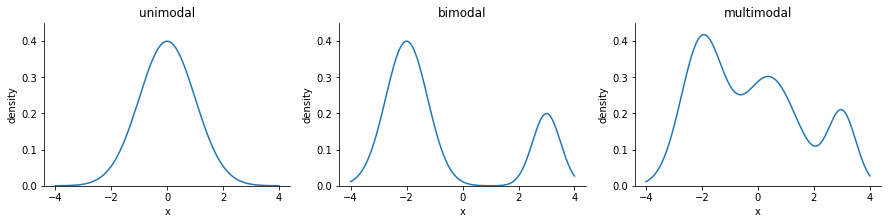

In [2]:
ax = stats_viz.different_modal_plots()

#### Measures of Spread
Measures of spread tell us how the data is dispersed; this will indicate how thin (low dispersion) or wide (very spread out) our distribution is.

##### Range
The range is the distance between the smallest value (minimum) and the largest value (maximum):

$$range = max(X) - min(X)$$

##### Variance
The variance describes how far apart observations are spread out from their average value (the mean). When calculating the sample variance, we divide by *n - 1* instead of *n* to account for using the sample mean ($\bar{x}$):

$$s^2 = \frac{\sum_{1}^{n} (x_i - \bar{x})^2}{n - 1}$$

This is referred to as Bessel's correction and is applied to get an unbiased estimator of the population variance. 

*Note that this will be in units-squared of whatever was being measured.*

##### Standard Deviation
The standard deviation is the square root of the variance, giving us a measure in the same units as our data. The sample standard deviation is calculated as follows:

$$s = \sqrt{\frac{\sum_{1}^{n} (x_i - \bar{x})^2}{n - 1}} = \sqrt{s^2}$$

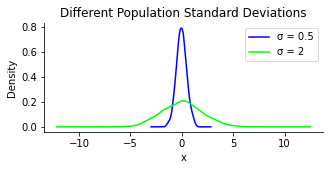

In [3]:
ax = stats_viz.effect_of_std_dev()

*Note that $\sigma^2$ is the population variance and $\sigma$ is the population standard deviation.*

##### Coefficient of Variation
The coefficient of variation (CV) gives us a unitless ratio of the standard deviation to the mean. Since, it has no units we can compare dispersion across datasets:

$$CV = \frac{s}{\bar{x}}$$

##### Interquartile Range
The interquartile range (IQR) gives us the spread of data around the median and quantifies how much dispersion we have in the middle 50% of our distribution:

$$IQR = Q_3 - Q_1$$

##### Quartile Coefficient of Dispersion
The quartile coefficient of dispersion also is a unitless statistic for comparing datasets. However, it uses the median as the measure of center. It is calculated by dividing the semi-quartile range (half the IQR) by the midhinge (midpoint between the first and third quartiles):

$$QCD = \frac{\frac{Q_3 - Q_1}{2}}{\frac{Q_1 + Q_3}{2}} = \frac{Q_3 - Q_1}{Q_3 + Q_1}$$

#### Summarizing data
The **5-number summary** provides 5 descriptive statistics that summarize our data:

| | Quartile | Statistic | Percentile |
| --- | --- | --- | --- |
|1.|$Q_0$|minimum|$0^{th}$|
|2.|$Q_1$|N/A|$25^{th}$|
|3.|$Q_2$|median|$50^{th}$|
|4.|$Q_3$|N/A|$75^{th}$|
|5.|$Q_4$|maximum|$100^{th}$|

This summary can be visualized using a **box plot** (also called box-and-whisker plot). The box has an upper bound of $Q_3$ and a lower bound of $Q_1$. The median will be a line somewhere in this box. The whiskers extend from the box towards the minimum/maximum. For our purposes, they will extend to $Q_3 + 1.5 \times IQR$ and $Q_1 - 1.5 \times IQR$ and anything beyond will be represented as individual points for outliers:

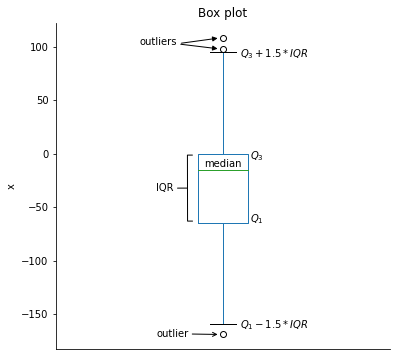

In [4]:
ax = stats_viz.example_boxplot()

The box plot doesn't show us how the data is distributed within the quartiles. To get a better sense of the distribution, we can use a **histogram**, which will show us the amount of observations that fall into equal-width bins. We can vary the number of bins to use, but be aware that this can change our impression of what the distribution appears to be:

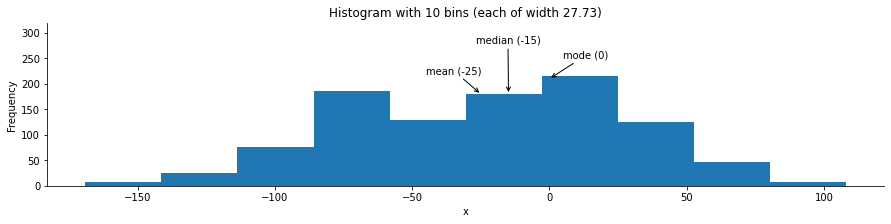

In [5]:
ax = stats_viz.example_histogram()

We can also visualize the distribution using a **kernel density estimate (KDE)**. This will estimate the **probability density function (PDF)**. This function shows how probability is distributed over the values. Higher values of the PDF mean higher likelihoods:

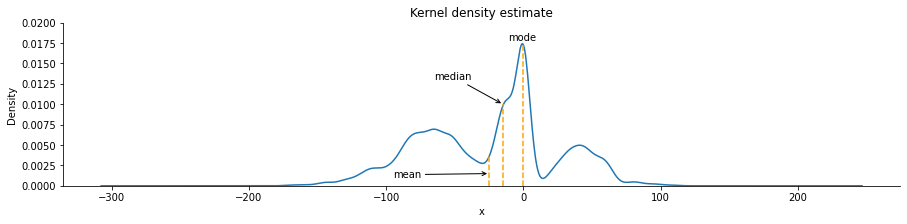

In [6]:
ax = stats_viz.example_kde()

Note that both the KDE and histogram estimate the distribution:

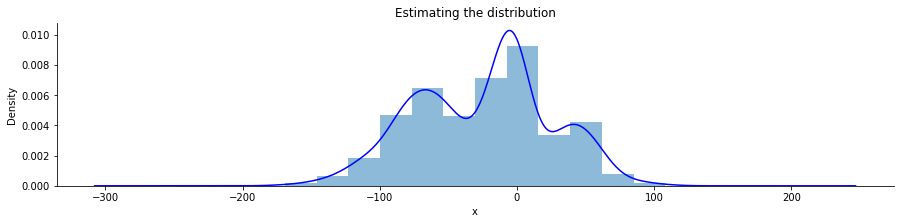

In [7]:
ax = stats_viz.hist_and_kde()

**Skewed distributions** have more observations on one side. The mean will be less than the median with negative skew, while the opposite is true of positive skew:

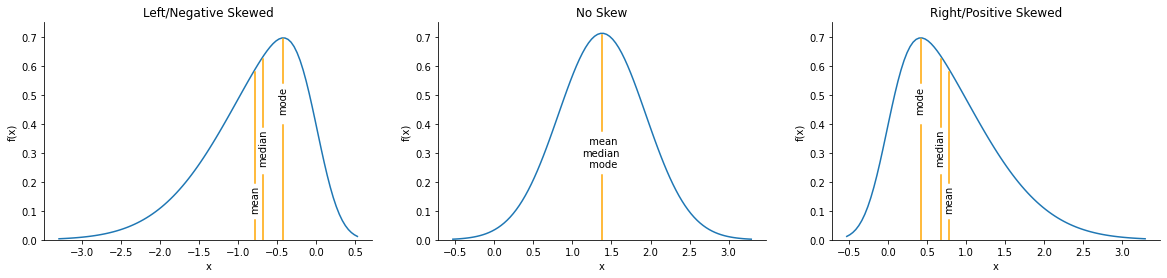

In [8]:
ax = stats_viz.skew_examples()

We can use the **cumulative distribution function (CDF)** to find probabilities of getting values within a certain range. The CDF is the integral of the PDF:

$$CDF = F(x) = \int_{-\infty}^{x} f(t) dt$$
 
*Note that $f(t)$ is the PDF and $\int_{-\infty}^{\infty} f(t) dt = 1$.*

The probability of the random variable $X$ being less than or equal to the specific value of $x$ is denoted as $P(X ≤ x)$. Note that for a continuous random variable the probability of it being exactly $x$ is zero.

Let's look at the estimate of the CDF from the sample data we used for the box plot, called the **empirical cumulative distribution function (ECDF)**:

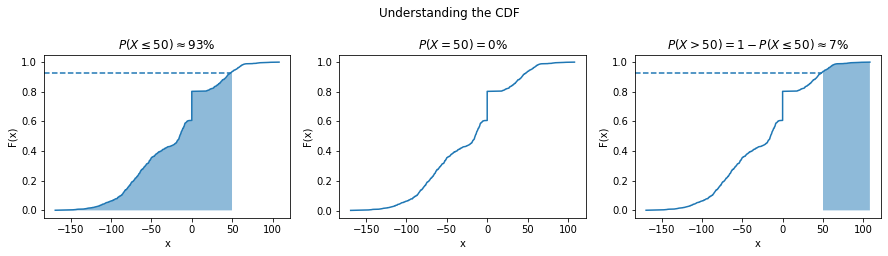

In [9]:
ax = stats_viz.cdf_example()

*We can find any range we want if we use some algebra as in the rightmost subplot above.*

#### Common Distributions
- **Gaussian (normal) distribution**: looks like a bell curve and is parameterized by its mean (μ) and standard deviation (σ). Many things in nature happen to follow the normal distribution, like heights. Note that testing if a distribution is normal is not trivial. Written as $N(\mu, \sigma)$.
- **Poisson distribution**: discrete distribution that is often used to model arrivals. Parameterized by its mean, lambda (λ). Written as $Pois(\lambda)$.
- **Exponential distribution**: can be used to model the time between arrivals. Parameterized by its mean, lambda (λ). Written as $Exp(\lambda)$.
- **Uniform distribution**: places equal likelihood on each value within its bounds (*a* and *b*). We often use this for random number generation. Written as $U(a, b)$.
- **Bernoulli distribution**: When we pick a random number to simulate a single success/failure outcome, it is called a Bernoulli trial. This is parameterized by the probability of success (*p*). Written as $Bernoulli(p)$.
- **Binomial distribution**: When we run the same experiment *n* times, the total number of successes is then a binomial random variable. Written as $B(n, p)$.

We can visualize both discrete and continuous distributions; however, discrete distributions give us a **probability mass function** (**PMF**) instead of a PDF:

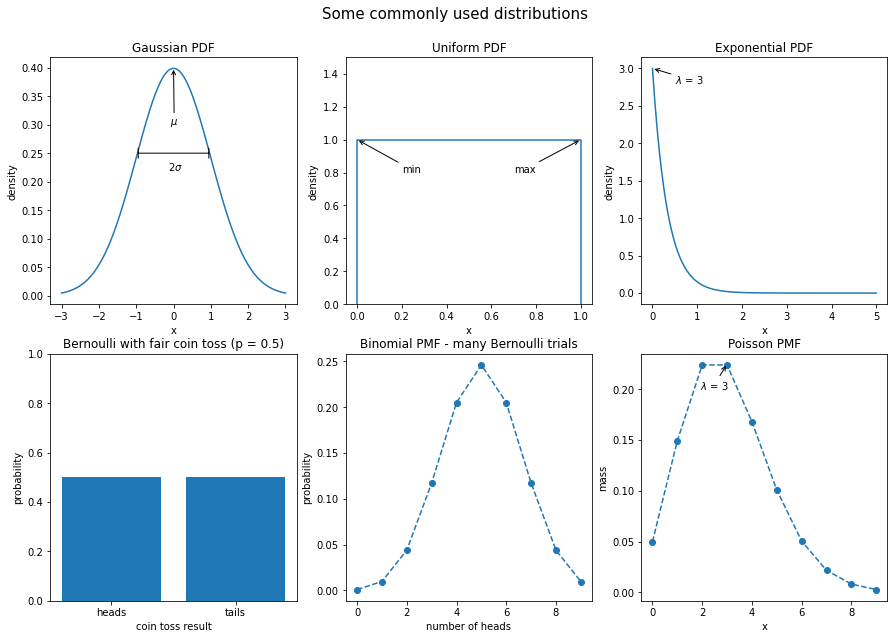

In [10]:
ax = stats_viz.common_dists()

#### Scaling data
In order to compare variables from different distributions, we would have to scale the data, which we could do with the range by using **min-max scaling**:

$$x_{scaled}=\frac{x - min(X)}{range(X)}$$

Another way is to use a **Z-score** to standardize the data:

$$z_i = \frac{x_i - \bar{x}}{s}$$

#### Quantifying relationships between variables
The **covariance** is a statistic for quantifying the relationship between variables by showing how one variable changes with respect to another (also referred to as their joint variance):

$$cov(X, Y) = E[(X-E[X])(Y-E[Y])]$$

*E[X] is the expectation of the random variable X (its long-run average).*

The sign of the covariance gives us the direction of the relationship, but we need the magnitude as well. For that, we calculate the **Pearson correlation coefficient** ($\rho$):

$$\rho_{X, Y} = \frac{cov(X, Y)}{s_X s_Y}$$

Examples:

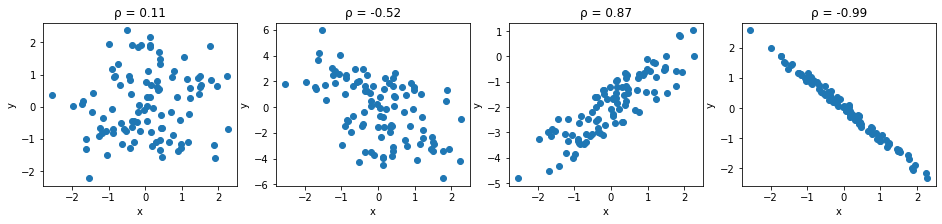

In [11]:
ax = stats_viz.correlation_coefficient_examples()

*From left to right: no correlation, weak negative correlation, strong positive correlation, and nearly perfect negative correlation.*

Often, it is more informative to use scatter plots to check for relationships between variables. This is because the correlation may be strong, but the relationship may not be linear:

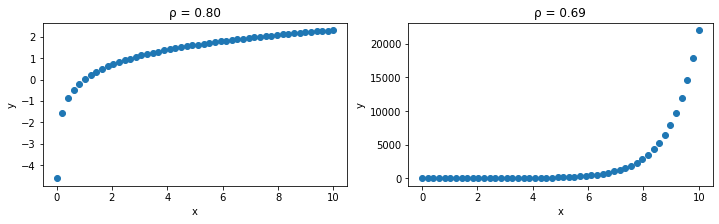

In [12]:
ax = stats_viz.non_linear_relationships()

Remember, **correlation does not imply causation**. While we may find a correlation between X and Y, it does not mean that X causes Y or Y causes X. It is possible there is some Z that causes both or that X causes some intermediary event that causes Y &mdash; it could even be a coincidence. Be sure to check out Tyler Vigen's [Spurious Correlations blog](https://www.tylervigen.com/spurious-correlations) for some interesting correlations.

#### Pitfalls of summary statistics
Not only can our correlation coefficients be misleading, but so can summary statistics. Anscombe's quartet is a collection of four different datasets that have identical summary statistics and correlation coefficients, however, when plotted, it is obvious they are not similar:

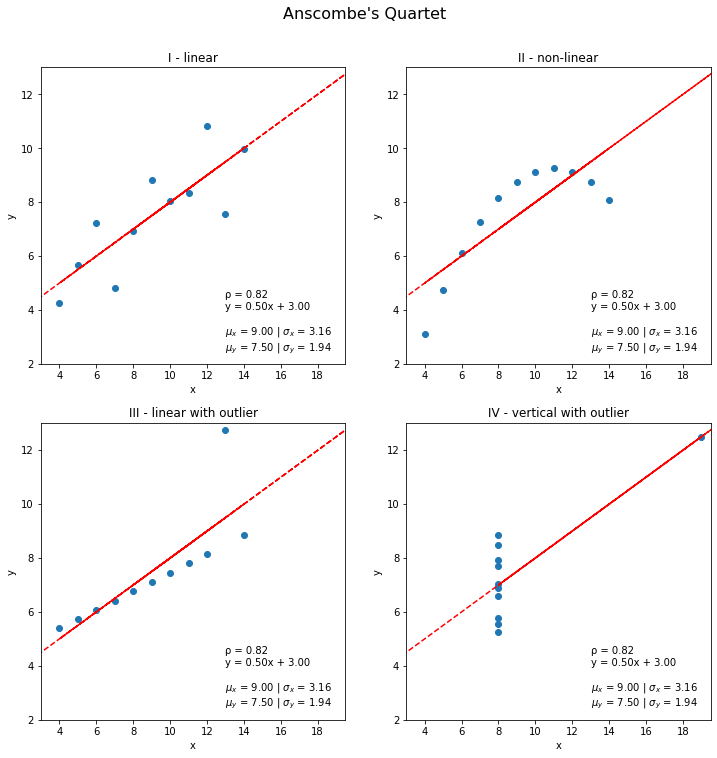

In [13]:
ax = stats_viz.anscombes_quartet()

Another example of this is the [Datasaurus Dozen](https://www.autodeskresearch.com/publications/samestats):

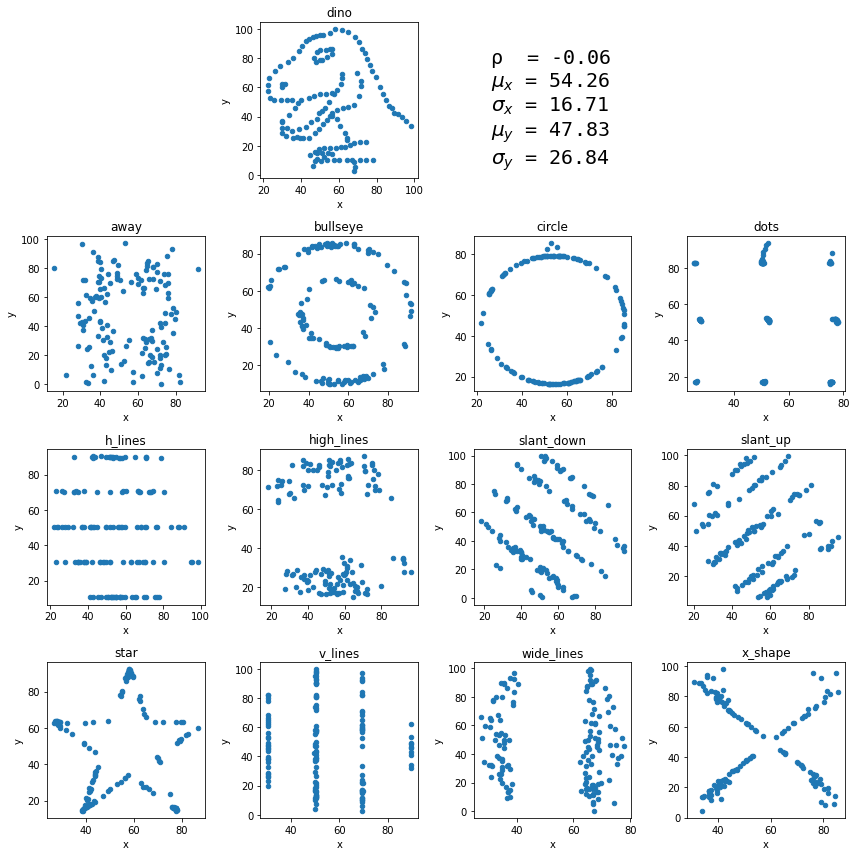

In [14]:
ax = stats_viz.datasaurus_dozen()

### Prediction and forecasting
Say our favorite ice cream shop has asked us to help predict how many ice creams they can expect to sell on a given day. They are convinced that the temperature outside has strong influence on their sales, so they collected data on the number of ice creams sold at a given temperature. We agree to help them, and the first thing we do is make a scatter plot of the data they gave us:

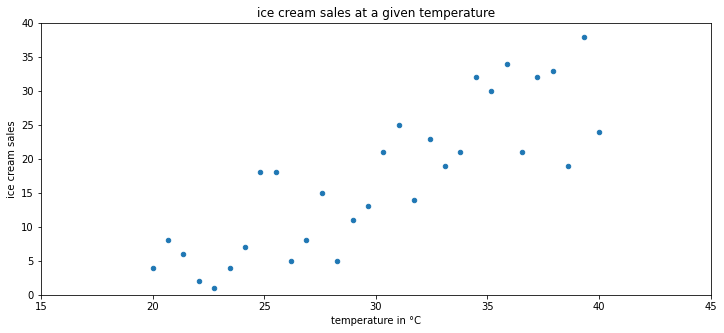

In [15]:
ax = stats_viz.example_scatter_plot()

We can observe an upward trend in the scatter plot: more ice creams are sold at higher temperatures. In order to help out the ice cream shop, though, we need to find a way to make predictions from this data. We can use a technique called **regression** to model the relationship between temperature and ice cream sales with an equation:

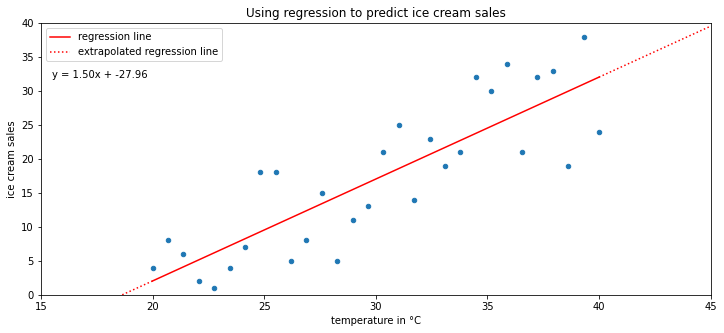

In [16]:
ax = stats_viz.example_regression()

We can use the resulting equation to make predictions for the number of ice creams sold at various temperatures. However, we must keep in mind if we are interpolating or extrapolating. If the temperature value we are using for prediction is within the range of the original data we used to build our regression model, then we are **interpolating** (solid portion of the red line). On the other hand, if the temperature is beyond the values in the original data, we are **extrapolating**, which is very dangerous, since we can't assume the pattern continues indefinitely in each direction (dotted portion of the line). Extremely hot temperatures may cause people to stay inside, meaning no ice creams will be sold, while the equation indicates record-high sales. 

Forecasting is a type of prediction for time series. In a process called **time series decomposition**, time series is decomposed into a trend component, a seasonality component, and a cyclical component. These components can be combined in an additive or multiplicative fashion:

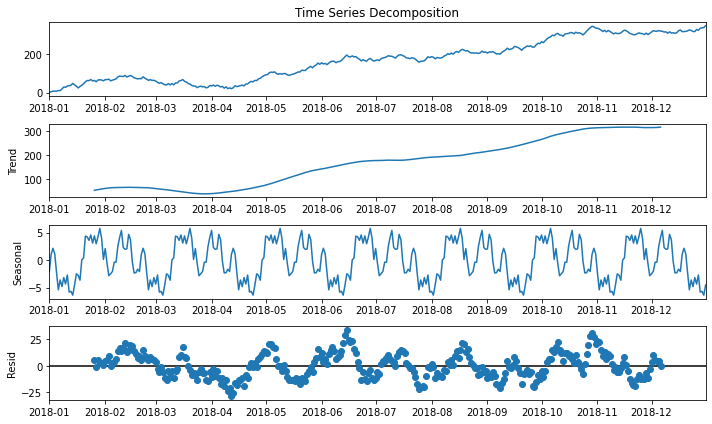

In [17]:
ax = stats_viz.time_series_decomposition_example()

The **trend** component describes the behavior of the time series in the long-term without accounting for the seasonal or cyclical effects. Using the trend, we can make broad statements about the time series in the long-run, such as: *the population of Earth is increasing* or *the value of a stock is stagnating*. **Seasonality** of a time series explains the systematic and calendar-related movements of a time series. For example, the number of ice cream trucks on the streets of New York City is high in the summer and drops to nothing in the winter; this pattern repeats every year regardless of whether the actual amount each summer is the same. Lastly, the **cyclical** component accounts for anything else unexplained or irregular with the time series; this could be something like a hurricane driving the number of ice cream trucks down in the short-term because it isn't safe to be outside. This component is difficult to anticipate with a forecast due to its unexpected nature.

When making models to forecast time series, some common methods include ARIMA-family methods and exponential smoothing. **ARIMA** stands for autoregressive (AR), integrated (I), moving average (MA). Autoregressive models take advantage of the fact that an observation at time $t$ is correlated to a previous observation, for example at time $t - 1$. Note that not all time series are autoregressive. The integrated component concerns the differenced data, or the change in the data from one time to another. Lastly, the moving average component uses a sliding window to average the last $x$ observations where $x$ is the length of the sliding window. We will build an ARIMA model in chapter 7.

The moving average puts equal weight on each time period in the past involved in the calculation. In practice, this isn't always a realistic expectation of our data. Sometimes all past values are important, but they vary in their influence on future data points. For these cases, we can use exponential smoothing, which allows us to put more weight on more recent values and less weight on values further away from what we are predicting.

### Inferential Statistics
Inferential statistics deals with inferring or deducing things from the sample data we have in order to make statements about the population as a whole. Before doing so, we need to know whether we conducted an observational study or an experiment. An observational study can't be used to determine causation because we can't control for everything. An experiment on the other hand is controlled.

Remember that the sample statistics we discussed earlier are estimators for the population parameters. Our estimators need **confidence intervals**, which provide a point estimate and a margin of error around it. This is the range that the true population parameter will be in at a certain **confidence level**. At the 95% confidence level, 95% of the confidence intervals calculated from random samples of the population contain the true population parameter.

We also have the option of using **hypothesis testing**. First, we define a null hypothesis (say the true population mean is 0), then we determine a **significance level** (1 - confidence level), which is the probability of rejecting the null hypothesis when it is true. Our result is statistically significant if the value for the null hypothesis is outside the confidence interval. [More info](https://statisticsbyjim.com/hypothesis-testing/hypothesis-tests-confidence-intervals-levels/).

<hr>

<div style="overflow: hidden; margin-bottom: 10px;">
    <div style="float: left;">
        <a href="./checking_your_setup.ipynb">
            <button>Check your setup</button>
        </a>
        <a href="./python_101.ipynb">
            <button>Python 101</button>
        </a>
    </div>
    <div style="float: right;">
        <a href="./exercises.ipynb">
            <button>Exercises</button>
        </a>
        <a href="../ch_02/1-pandas_data_structures.ipynb">
            <button>Chapter 2 &#8594;</button>
        </a>
    </div>
</div>
<hr>